# Imports

In [1]:
import numpy as np
from nnfs.datasets import spiral_data, vertical_data
import matplotlib.pyplot as plt

# Layer Class

In [2]:
class Layer:
    def __init__(self, inputs):
        if len(inputs) < 1:
            raise ValueError("Need at least one data")
        if len(inputs[0]) < 1:
            raise ValueError("Need at least one neuron")
        self.output = inputs

    def getoutput(self):
        return self.output

    def getsize(self):
        return len(self.output[0])

    def getbatchsize(self):
        return len(self.output)

class HiddenLayer(Layer):
    def __init__(self, prevLayer, numOfNeurons: int, weightss = None, biass = None):
        self.input = prevLayer
        self.batchsize = self.input.getbatchsize()
        super().__init__([[0] * numOfNeurons for _ in range(self.batchsize)])
        self.layerShape = numOfNeurons
        self.weights = weightss or 0.1 * np.random.randn(self.input.getsize(), self.layerShape)
        self.biases = biass or np.zeros((1, self.layerShape))
        if weightss and biass:
            if len(weightss) != len(biass) != numOfNeurons:
                raise ValueError("Number of weights or biases doesn't match number of neurons.")
            for weigh in weightss:
                if len(weigh) != self.input.getsize():
                    raise ValueError("At least one of the neuron's weights doesn't match the given input layer")

    def tweek_node_bias(self, neuron: int, db: int):
        if neuron < 0 or neuron >= self.layerShape:
            raise ValueError(f"neuron {neuron} is outOfBounds. There are {self.layerShape} neurons.")
        self.biases[neuron] += db

    def tweek_node_weights(self, neuron: int, input: int, dw: int):
        if neuron < 0 or neuron >= self.layerShape:
            raise ValueError(f"neuron {neuron} is outOfBounds. There are {self.layerShape} neurons.")
        if neuron < 0 or neuron >= self.layerShape:
            raise ValueError(f"neuron {neuron} is outOfBounds. There are {self.input.getsize()} neurons in the previous layer.")
        self.weights[neuron][input] += dw

    def forward(self):
        self.input.forward()
        self.output = np.dot(np.array(self.input.getoutput()), np.array(self.weights)) + self.biases


class InputLayer(Layer):
    def __init__(self, inputs):
        super().__init__(inputs)

    def forward(self):
        return self.output


# Initializations

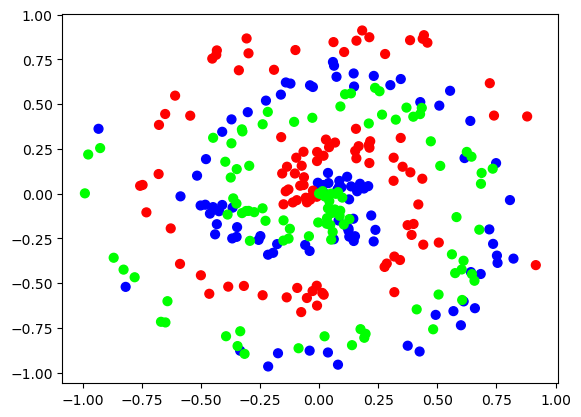

In [4]:
X, y = vertical_data(100, 3)
spiral_X, spiral_y = spiral_data(100, 3)
plt.scatter(spiral_X[:, 0], spiral_X[:, 1], c=y, s=40, cmap='brg')
plt.show()

spiral_X_layer = InputLayer(spiral_X)
spiral_layer1 = HiddenLayer(spiral_X_layer, 3)
spiral_layer2 = HiddenLayer(spiral_layer1, 3)

# Running

In [6]:
spiral_layer2.forward()
spiral_layer2.getoutput()

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.61315861e-04, -2.56921711e-04, -1.24397386e-05],
       [-1.03290253e-04, -1.76471125e-04, -2.45834952e-04],
       [-4.70527478e-04, -7.54224068e-04, -1.32362357e-04],
       [-6.45425889e-04, -1.02841589e-03, -5.91221234e-05],
       [-7.57739718e-04, -1.21825230e-03, -2.85648047e-04],
       [-9.64920427e-04, -1.53458006e-03, -3.04229537e-05],
       [-9.32581638e-04, -1.51086015e-03, -5.80322980e-04],
       [-3.49237062e-04, -6.04786207e-04, -9.92545429e-04],
       [-5.61825765e-04, -9.47300776e-04, -1.08712203e-03],
       [-5.51654669e-04, -9.37974400e-04, -1.22297545e-03],
       [-1.12773503e-03, -1.85032696e-03, -1.16503175e-03],
       [-1.83895058e-03, -2.95399759e-03, -6.42218188e-04],
       [ 5.17956579e-04,  7.46450233e-04, -1.52032205e-03],
       [-6.37972384e-04, -1.10079543e-03, -1.73353907e-03],
       [-1.49907219e-03, -2.46263823e-03, -1.60911295e-03],
       [-2.03402080e-04, -4.24078723e-04